<h3>Titanic Survival Analysis</h3>
<h4>The Challenge</h4>
<p>
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, i'll try to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

</p>

<h4>Key Points</h4>
<ul>
    <li>Binary Classification Problem: The target variable in this dataset is binary, indicating survival status (1 for survived and 0 for not survived).</li>
    <li>Features: The dataset includes various features(predictor/independent variables) such as passenger demographics (age, sex), socioeconomic status (ticket class, fare), and other relevant attributes that may influence survival chances.The target feature is the `Survived` column.</li>
    <li>Modelling Techniques: I'll use Random forest algorithm for its robustness</li>
</ul>

<h4>1.Importing libraries</h4>

In [1]:
#import libraries for data manipulation & visualizing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h4>2.Reading and exploring the data</h4>
Lets import the train and test sets provided and check their sizes, dimensions and summary statistics

In [2]:
# View file location
!pwd; ls titanic

/home/patrick/Documents/datascience/projects/python/titanic-survival-analysis
gender_submission.csv  test.csv  train.csv


In [3]:
# Define file paths for the training and test datasets
train_file_path = "titanic/train.csv"
test_file_path = "titanic/test.csv"

# Load the training dataset using error handling
try:
    train_df = pd.read_csv(train_file_path)
    print("Training dataset loaded successfully")
except FileNotFoundError:
    print(f"Error: The file {train_file_path} was not found.")

# Load the test dataset
try:
    test_df = pd.read_csv(test_file_path)
    print("Test dataset loaded successfully")
except FileNotFoundError:
    print(f"Error: The file {test_file_path} was not found.")

# View first five rows of dataset
train_df.head(5)

Training dataset loaded successfully
Test dataset loaded successfully


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h4>3.Data Analysis</h4>
We're going to consider the features in the dataset and how complete they are.

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# View a sample of the dataset to get an idea of the variables
train_df.sample(5, random_state=42)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [6]:
#see a summary of the training dataset
train_df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
# Get a summary view of features/columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# View percentage of missing values in each column
def missing_data_percentage(df):
    total_rows = df.shape[0] # get the total number of rows
    missing_values = df.isnull().sum() # Calculate the number of missing values for each column
    missing_percentage = (missing_values / total_rows) * 100 # Calculate the percentage of missing values
    missing_data_df = pd.DataFrame({
        'Missing Values': missing_values,  # Create a DataFrame for better visualization
        'Percentage': missing_percentage
    })
    print("Missing Data Percentage in Each Column:")
    print(missing_data_df[missing_data_df['Missing Values'] > 0]) 
print(missing_data_percentage(train_df))

Missing Data Percentage in Each Column:
          Missing Values  Percentage
Age                  177   19.865320
Cabin                687   77.104377
Embarked               2    0.224467
None


Some Observations:
<ul>
<li>There are a total of 891 passengers in our training set.</li>
<li>The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.</li>
<li>The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.</li>
<li>The Embarked feature is missing 0.22% of its values, which should be relatively harmless.</li></ul>

<h4>4.Data Visualization</h4>

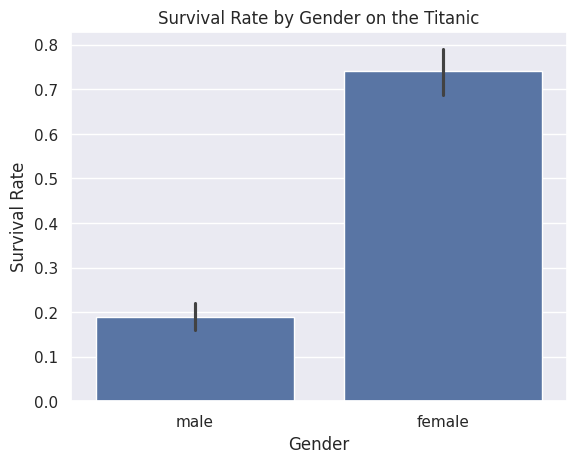

Percentage of females who survived:  74.20382165605095
Percentage of males who survived:  18.890814558058924


In [9]:
# Visualizing the sex feature
def plot_survival_by_sex(data):
    """
    Plots the survival rate by sex and prints the survival percentages for females and males.

    Parameters:
    data (DataFrame): A pandas DataFrame containing 'Sex' and 'Survived' columns.
    """
    sns.set(style="darkgrid")
    sns.barplot(x="Sex", y="Survived", data = data)
    plt.xlabel("Gender")
    plt.ylabel("Survival Rate")
    plt.title("Survival Rate by Gender on the Titanic")

    plt.show()
    female_survival_rate = data["Survived"][data["Sex"] == "female"].value_counts(normalize=True)[1] * 100
    print("Percentage of females who survived: ", female_survival_rate)
    male_survival_rate = data["Survived"][data["Sex"] == "male"].value_counts(normalize=True)[1] * 100
    print("Percentage of males who survived: ", male_survival_rate)
plot_survival_by_sex(train_df)

`Observation`: As predicted, females have a much higher chance of survival than males. The Sex feature is essential in our predictions.

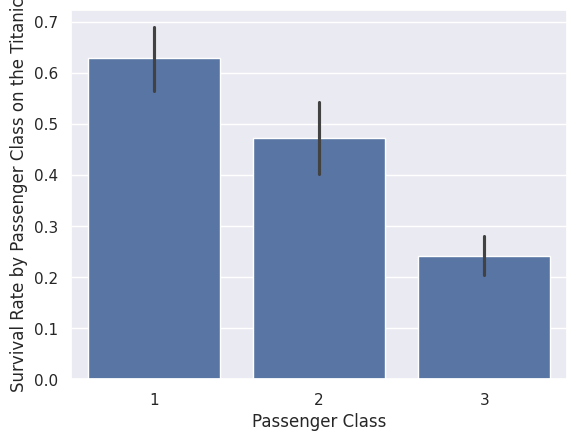

Percentage of Passengers by class = 1 who survived:  62.96296296296296
Percentage of Passengers by class = 2 who survived:  47.28260869565217
Percentage of Passengers by class = 3 who survived:  24.236252545824847


In [10]:
# Draw a bar plot of survival rate by Pclass
def plot_survival_by_pclass(data):
   """
   Takes a DataFrame containing Titanic passenger data,
   generates a bar plot of survival rates by Pclass, and prints the 
   percentages of passengers in each class who survived.
    
     Parameters:
    data (DataFrame): A pandas DataFrame containing the Titanic dataset.
   """
   sns.set(style="darkgrid")
   sns.barplot(x="Pclass", y = "Survived", data=data)
   plt.xlabel("Passenger Class")
   plt.ylabel("Survival Rate by Passenger Class on the Titanic")
   plt.show()
   for pclass in range(1,4):
       survival_rate = data["Survived"][data["Pclass"] == pclass].value_counts(normalize=True)[1] * 100
       print(f"Percentage of Passengers by class = {pclass} who survived: ", survival_rate)

# call the function with our train_df arg
plot_survival_by_pclass(train_df)

`Observation`: The survival rate of passengers in first class seemes to be higher than other classes.Ofcourse further analysis is required to determine why the data is skewed.

In [11]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

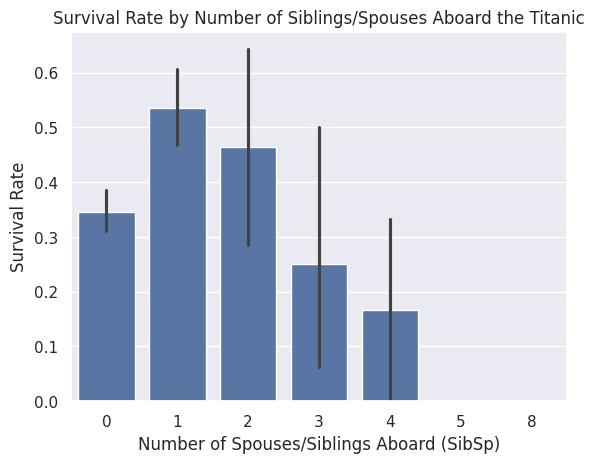

Percentage of SibSp = 0 who survived:  34.53947368421053
Percentage of SibSp = 1 who survived:  53.588516746411486
Percentage of SibSp = 2 who survived:  46.42857142857143


In [12]:
# visualize the SibSp feature
def plot_survival_by_sibsp(data):
    """
     This function takes a DataFrame containing Titanic passenger data,
    generates a bar plot of survival rates by SibSp (siblings/spouses aboard),
    and prints the percentages of passengers with 0, 1, and 2 siblings/spouses who survived.

    Parameters:
    data (DataFrame): A pandas DataFrame containing the Titanic dataset.
    """
    sns.set(style="darkgrid")
    sns.barplot(x="SibSp", y="Survived", data=data)
    plt.xlabel("Number of Spouses/Siblings Aboard (SibSp)")
    plt.ylabel("Survival Rate")
    plt.title("Survival Rate by Number of Siblings/Spouses Aboard the Titanic")
    plt.show()
    for sibsp in range(3):
        survival_rate = data["Survived"][data["SibSp"] == sibsp].value_counts(normalize=True)[1] * 100
        print(f"Percentage of SibSp = {sibsp} who survived: ", survival_rate)
plot_survival_by_sibsp(train_df)

`Observation`: In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)

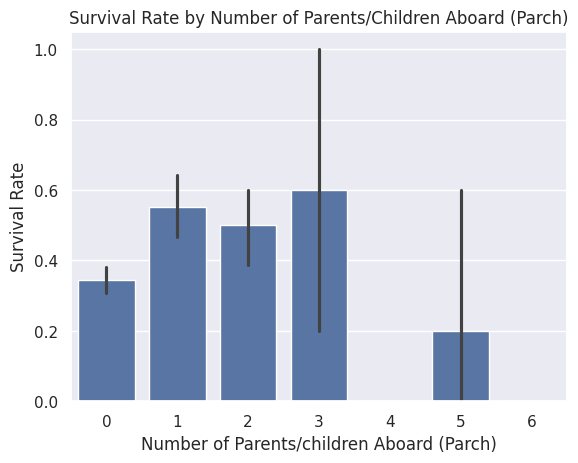

In [13]:
# Visualize the Parch feature
def plot_parch_vs_survival(data):
    """
    Plots a bar plot for Parch vs. survival.
    
    Parameters:
    data (DataFrame): The input DataFrame containing 'Parch' and 'Survived' columns.
    """
    sns.barplot(x="Parch", y="Survived", data=data)
    plt.title("Survival Rate by Number of Parents/Children Aboard (Parch)")
    plt.xlabel("Number of Parents/children Aboard (Parch)")
    plt.ylabel("Survival Rate")
    plt.show()
plot_parch_vs_survival(train_df)   

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.



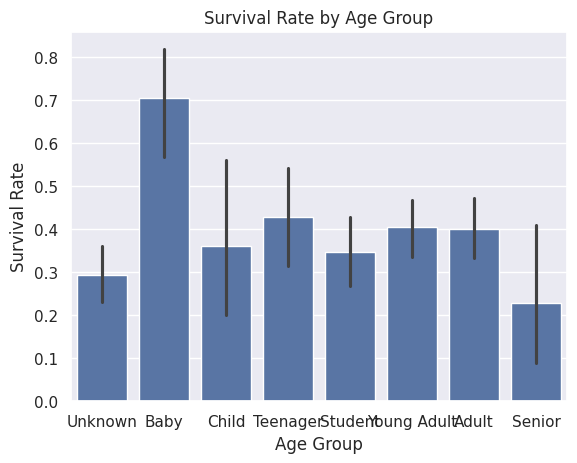

In [14]:
# Visualize the Age feature
def plot_age_group_vs_survival(train, test):
    """
     Sorts ages into logical categories and plots a bar plot of AgeGroup vs. survival.
    
    Parameters:
    train (DataFrame): The training DataFrame containing 'Age' and 'Survived' columns.
    test (DataFrame): The test DataFrame containing 'Age' column.
    """
    train["Age"] = train["Age"].fillna(-0.5)
    test["Age"] = test["Age"].fillna(-0.5)
    bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
    labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    train["AgeGroup"] = pd.cut(train["Age"], bins=bins, labels=labels)
    test["AgeGroup"] = pd.cut(test["Age"], bins=bins, labels=labels)
    sns.barplot(x="AgeGroup", y="Survived", data=train)
    plt.title("Survival Rate by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Survival Rate")
    plt.show()
plot_age_group_vs_survival(train_df, test_df)

`Observation`: Baby's are more likely to survive than other Age brackets

In [15]:
# Add other visualizations
"""--More--"""

'--More--'

5: Data Cleaning

In [16]:
# View test data
test_df.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8
top,NaN,NaN,"Peter, Master. Michael J",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN


- We have a total of 418 passengers.
- 1 value from the Fare feature is missing.
- Around 20.5% of the Age feature is missing, we will need to fill that in.


In [17]:
# Drop the Cabin and Ticket features because they're not likely to yield any important information for our hypothesis
# Cabin Feature
train = train_df.drop(["Cabin"], axis = 1)
test = test_df.drop(["Cabin"], axis = 1)

In [18]:
# Ticket Feature
train = train_df.drop(["Ticket"], axis = 1)
test = test.drop(["Ticket"], axis = 1)

In [19]:
#now we need to fill in the missing values in the Embarked feature
def count_embarked_passengers(train):
    """
       Counts the number of passengers embarking from each port (S, C, Q) in the train DataFrame.
    
    Parameters:
    train (DataFrame): The training DataFrame containing the 'Embarked' column.
    """
    # Count passengers embarking from Southampton (S)
    southampton = train[train["Embarked"] == "S"].shape[0]
    print("Number of people embarking in Southampton (S):", southampton)

    # Count passengers embarking from Cherbourg (C)
    cherbourg = train[train["Embarked"] == "Q"].shape[0]
    print("Number of people embarking in Cherbourg (C):", cherbourg)

    queenstown = train[train["Embarked"] == "Q"].shape[0]
    print('Number of people embarking in Queenstown (Q): ', queenstown)
    
    

In [20]:
count_embarked_passengers(train)

Number of people embarking in Southampton (S): 644
Number of people embarking in Cherbourg (C): 77
Number of people embarking in Queenstown (Q):  77


`Observation`: Majority of people embarked in SouthAmpton

In [21]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

In [22]:
# Age Feature
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_19265/3690331523.py:7: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
# replace various titles with more common names
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [24]:
# map each of the title groupings to a numerical value
title_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_map)
    dataset["Title"] = dataset["Title"].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Young Adult,1


In [25]:
# fill missing age group with with mode for each feature
"""def fill_missing_age_groups(train, test):
    age_title_mapping = {
        1: "Young Adult",
        2: "Student",
        3: "Adult",
        4: "Baby",
        5: "Adult",
        6: "Adult"
    }
    mode_age_groups = train.groupby("Title")["AgeGroup"].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
    # Function to fill age group based on title
    def fill_age_group(df):
        # Fill NaN or "Unknown" values with the mode based on Title
        df["AgeGroup"] = df.apply(
            lambda row: mode_age_groups[row["Title"]] if pd.isna(row["AgeGroup"]) or row["AgeGroup"] == "Unknown" else row["AgeGroup"],
            axis=1
        )
        return df
     #Apply the filling function to both train and test datasets
    train = fill_age_group(train)
    test = fill_age_group(test)
    return train, test
"""
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#I tried to get this code to work with using .map(), but couldn't.
#I've put down a less elegant, temporary solution for now.
#train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
#test = test.fillna({"Age": test["Title"].map(age_title_mapping)})

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

/tmp/ipykernel_19265/1629323109.py:42: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
/tmp/ipykernel_19265/1629323109.py:46: FutureWarning: ChainedAssignmentError: behaviour will cha

In [26]:
#fill_missing_age_groups(train, test)

Now that we've filled in the missing values at least somewhat accurately (I will work on a better way for predicting missing age values), it's time to map each age group to a numerical value.

In [27]:
#map each Age value to a numerical value
def transform_age_group(train, test):
    """
       Transforms age groups in the train and test DataFrames by mapping 
    categorical age values to numerical values and dropping the 'Age' column.

    Parameters:
    train (pd.DataFrame): The training DataFrame containing 'AgeGroup' and 'Age' columns.
    test (pd.DataFrame): The testing DataFrame containing 'AgeGroup' and 'Age' columns.

    Returns:
    pd.DataFrame, pd.DataFrame: Transformed train and test DataFrames.
    """
    age_mapping = {
        "Baby": 1,
        "Child": 2,
        "Teenager": 3,
        "Student": 4,
        "Young Adult": 5,
        "Adult": 6,
        "Senior": 7
    }

    train["AgeGroup"] = train["AgeGroup"].map(age_mapping)
    test["AgeGroup"] = test["AgeGroup"].map(age_mapping)

      # Dropping the Age feature for now; this can be adjusted later if needed
    return train, test
    

In [28]:
transform_age_group(train, test)

(     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [29]:
# Name Feature
# We can drop the name feature now that we've extracted the titles
#drop the name feature since it contains no more useful information.
train = train.drop(["Name"], axis = 1)
test = test.drop(["Name"], axis= 1)


In [30]:
# Sex Feature
# Map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train["Sex"] = train["Sex"].map(sex_mapping)
test["Sex"] = test["Sex"].map(sex_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,4.0,1
1,2,1,1,1,38.0,1,0,71.2833,C85,C,6.0,3
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,5.0,2
3,4,1,1,1,35.0,1,0,53.1000,C123,S,5.0,3
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,5.0,1


In [31]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,0,22.0,1,0,7.2500,NaN,1,4.0,1
1,2,1,1,1,38.0,1,0,71.2833,C85,2,6.0,3
2,3,1,3,1,26.0,0,0,7.9250,NaN,1,5.0,2
3,4,1,1,1,35.0,1,0,53.1000,C123,1,5.0,3
4,5,0,3,0,35.0,0,0,8.0500,NaN,1,5.0,1


In [32]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)
train.head()

/tmp/ipykernel_19265/2793590430.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
/tmp/ipykernel_19265/2793590430.py:5: SettingWithCopyWarning: 
A value is trying 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,AgeGroup,Title,FareBand
0,1,0,3,0,22.0,1,0,NaN,1,4.0,1,1
1,2,1,1,1,38.0,1,0,C85,2,6.0,3,4
2,3,1,3,1,26.0,0,0,NaN,1,5.0,2,2
3,4,1,1,1,35.0,1,0,C123,1,5.0,3,4
4,5,0,3,0,35.0,0,0,NaN,1,5.0,1,2


In [33]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,892,3,0,34.5,0,0,3,5.0,1,1
1,893,3,1,47.0,1,0,1,6.0,3,1
2,894,2,0,62.0,0,0,3,7.0,1,2
3,895,3,0,27.0,0,0,1,5.0,1,2
4,896,3,1,22.0,1,1,1,4.0,3,2


In [34]:
# Seems i didn't drop the Cabin feature
# Let's Drop it
train = train.drop("Cabin", axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,1,0,3,0,22.0,1,0,1,4.0,1,1
1,2,1,1,1,38.0,1,0,2,6.0,3,4
2,3,1,3,1,26.0,0,0,1,5.0,2,2
3,4,1,1,1,35.0,1,0,1,5.0,3,4
4,5,0,3,0,35.0,0,0,1,5.0,1,2


In [35]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
Title          0
FareBand       0
dtype: int64

<h4>6: Model Fitting</h4>

In [40]:
# Splitting the training data
from sklearn.model_selection import train_test_split
def split_data(train, target_column="Survived", drop_columns=["PassengerId"]):
    """
     Splits the training DataFrame into training and validation sets.

    Parameters:
    train (pd.DataFrame): The DataFrame containing the training data.
    target_column (str): The name of the target column.
    drop_columns (list): A list of columns to drop from predictors.

    Returns:
    X_train (pd.DataFrame): Training features.
    X_test (pd.DataFrame): Validation features.
    y_train (pd.Series): Training target.
    y_test (pd.Series): Validation target.
    """
    X = train.drop([target_column] + drop_columns, axis=1)
    y = train[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    return X_train, X_test, y_train, y_test
    

In [41]:
# Assign variables to split function
X_train, X_test, y_train, y_test = split_data(train)

In [42]:
# Verify their shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(712, 9) (179, 9)
(712,) (179,)
